In [67]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, matplotlib.ticker as mtick, os
sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

In [3]:
# 1) Data
df = sns.load_dataset("tips").copy()
print(df.shape); display(df.head())
display(df.info())
df["tip_pct"] = df["tip"] / df["total_bill"]
df = df[df["size"] > 0].copy()
cat_cols = ["sex", "smoker", "day", "time"]
for c in cat_cols: df[c] = df[c].astype("category")

(244, 7)


total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


None

In [4]:
# 2) Data quality
missing = df.isna().mean().sort_values(ascending=False)
dups = df.duplicated().sum()
display(missing, dups)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
tip_pct       0.0
dtype: float64

np.int64(1)

In [5]:
# 3) Quick stats
num_cols = df.select_dtypes(include=np.number).columns
display(df[num_cols].describe().T)

count       mean       std       min        25%       50%  \
total_bill  244.0  19.785943  8.902412  3.070000  13.347500  17.79500   
tip         244.0   2.998279  1.383638  1.000000   2.000000   2.90000   
size        244.0   2.569672  0.951100  1.000000   2.000000   2.00000   
tip_pct     244.0   0.160803  0.061072  0.035638   0.129127   0.15477   

                  75%        max  
total_bill  24.127500  50.810000  
tip          3.562500  10.000000  
size         3.000000   6.000000  
tip_pct      0.191475   0.710345

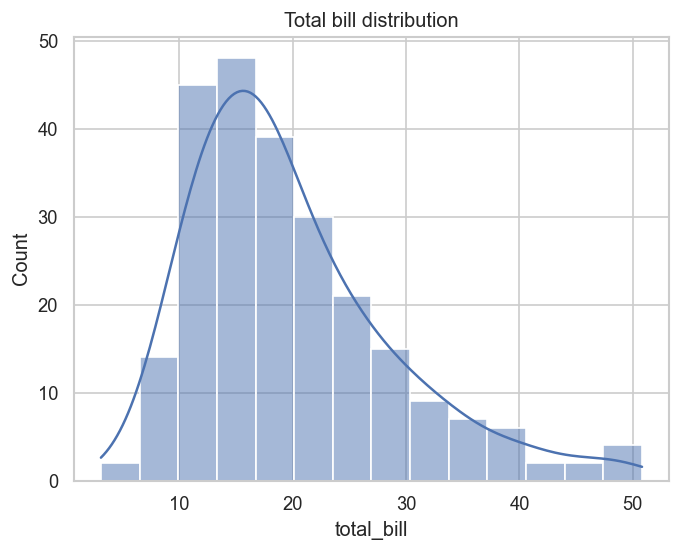

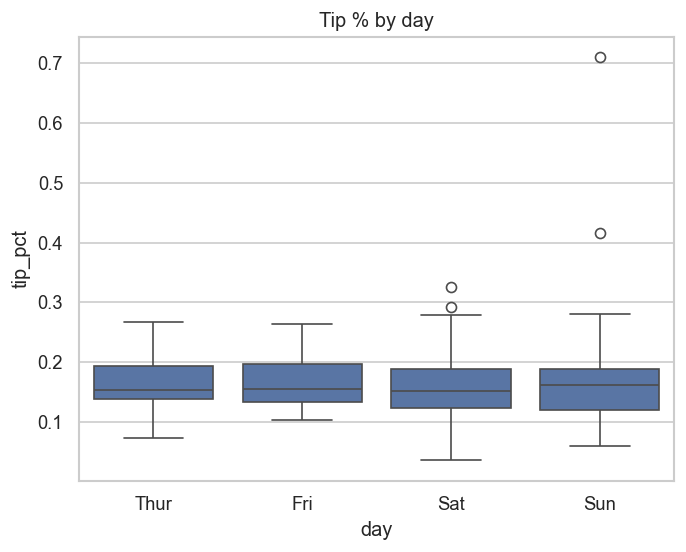

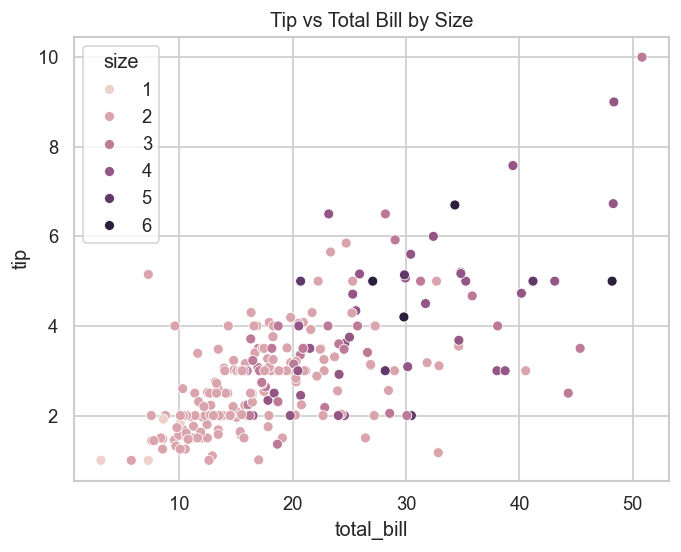

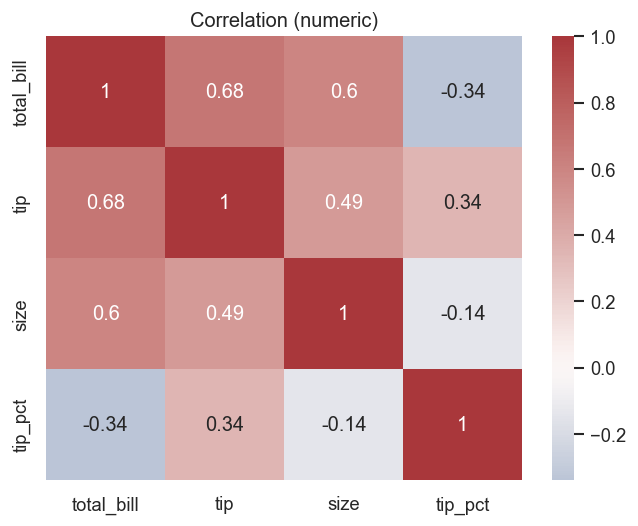

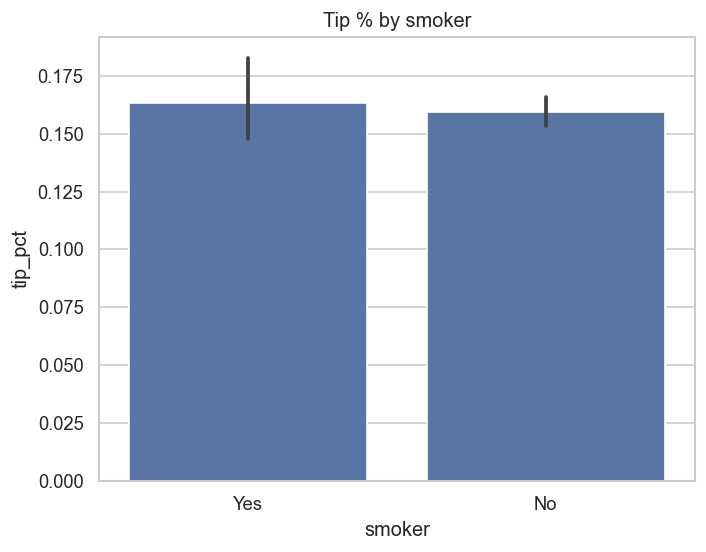

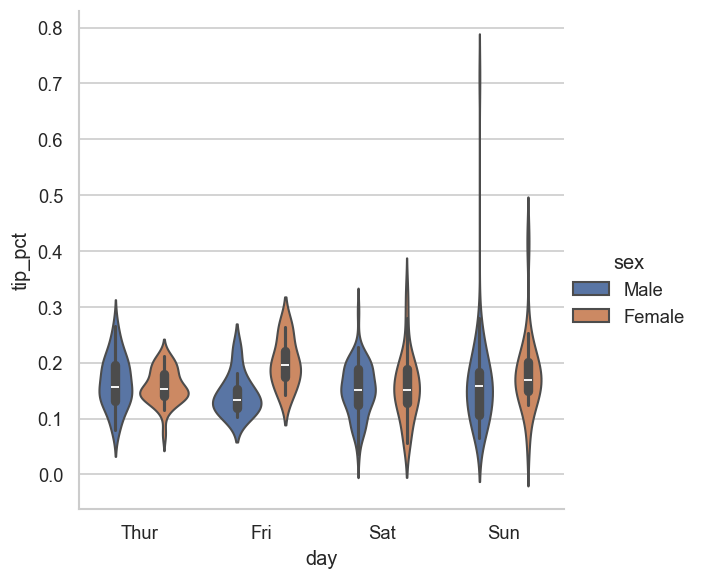

In [71]:
# 4) Plots (örnekler)
sns.histplot(df["total_bill"], kde=True); plt.title("Total bill distribution"); plt.savefig("figures/total_bill_hist.png"); plt.show()
sns.boxplot(data=df, x="day", y="tip_pct"); plt.title("Tip % by day"); plt.savefig("figures/tip_pct_by_day.png"); plt.show()
sns.scatterplot(data=df, x="total_bill", y="tip", hue="size"); plt.title("Tip vs Total Bill by Size"); plt.savefig("figures/tip_vs_bill_size.png"); plt.show()
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="vlag", center=0); plt.title("Correlation (numeric)"); plt.savefig("figures/corr_heatmap.png"); plt.show()
sns.barplot(data=df, x="smoker", y="tip_pct"); plt.title("Tip % by smoker"); plt.savefig("figures/tip_pct_smoker.png"); plt.show()
sns.catplot(data=df, x="day", y="tip_pct", hue="sex", kind="violin"); plt.savefig("figures/tip_pct_day_sex.png"); plt.show()

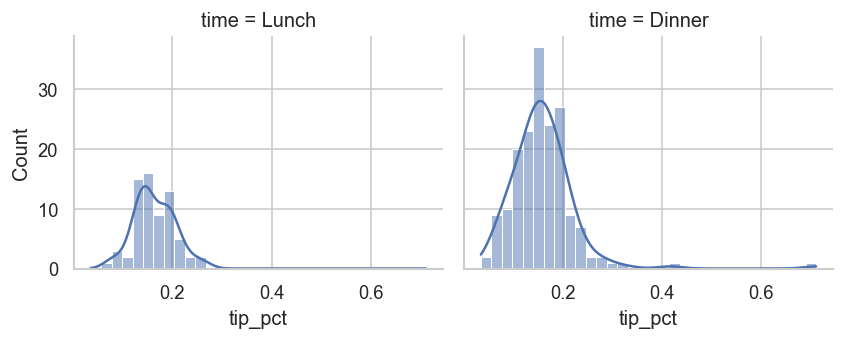

In [22]:
sns.displot(data=df, x="tip_pct", col="time", kde=True, height=3, aspect=1.2)

plt.show()

In [36]:
df["bill_per_person"] = df["total_bill"] / df["size"]
df["high_tip"] = df["tip"]/df["total_bill"] >=.18
#df["high_tip"] = df["high_tip"].replace(False, 0)
#df["high_tip"] = df["high_tip"].replace(True, 1)
df

total_bill   tip     sex smoker   day    time  size   tip_pct  high_tip  \
0         16.99  1.01  Female     No   Sun  Dinner     2  0.059447     False   
1         10.34  1.66    Male     No   Sun  Dinner     3  0.160542     False   
2         21.01  3.50    Male     No   Sun  Dinner     3  0.166587     False   
3         23.68  3.31    Male     No   Sun  Dinner     2  0.139780     False   
4         24.59  3.61  Female     No   Sun  Dinner     4  0.146808     False   
..          ...   ...     ...    ...   ...     ...   ...       ...       ...   
239       29.03  5.92    Male     No   Sat  Dinner     3  0.203927      True   
240       27.18  2.00  Female    Yes   Sat  Dinner     2  0.073584     False   
241       22.67  2.00    Male    Yes   Sat  Dinner     2  0.088222     False   
242       17.82  1.75    Male     No   Sat  Dinner     2  0.098204     False   
243       18.78  3.00  Female     No  Thur  Dinner     2  0.159744     False   

     bill_per_person  
0           8.495000  
1           3.446667  
2           7.003333  
3          11.840000  
4           6.147500  
..               ...  
239         9.676667  
240        13.590000  
241        11.335000  
242         8.910000  
243         9.390000  

[244 rows x 10 columns]

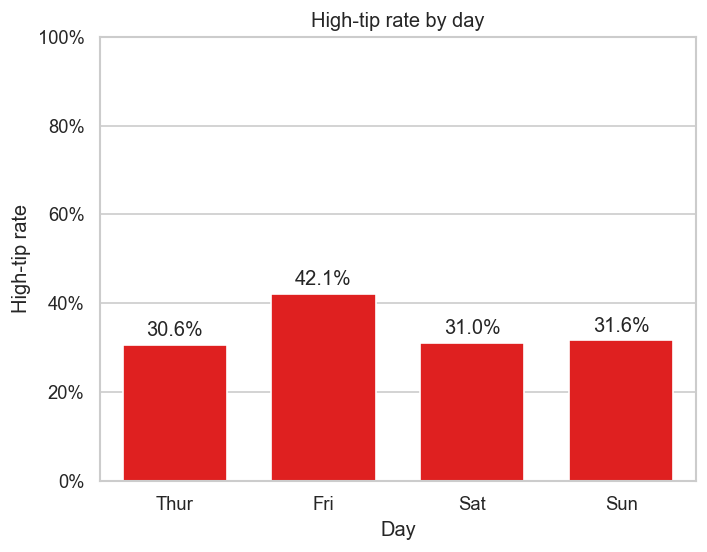

In [79]:
ax = sns.barplot(
    data=df,
    x="day",
    y="high_tip",
    estimator=np.mean,
    errorbar=None,
    color="red",
    width=.7
)

ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_title("High-tip rate by day")
ax.set_xlabel("Day"); ax.set_ylabel("High-tip rate")

#adding percentage labels
for p in ax.patches:
    h = p.get_height()
    ax.annotate(f"{h:.1%}", (p.get_x()+p.get_width()/2, h +.01),
                ha="center", va="bottom", fontsize=12)

plt.savefig("figures/high_tip_rate_by_day.png", dpi=150, bbox_inches="tight")

plt.show()

#### High-tip rate is roughly flat at ~31% on Thu, Sat, and Sun.
#### On Friday, the high-tip rate rises to ~42% (≈11 percentage points higher than other days).

# groupby practice

In [107]:
dfcopy_one = df.copy()

table = (
    dfcopy_one
    .groupby(["day", "time"])
    .agg(
        tip_pct_mean=("tip_pct","mean"),
        n=("tip_pct","size")
    )
    .reset_index()
)
table["tip_pct_mean"] = (table["tip_pct_mean"] * 100).round(1)
table["tip_pct_mean"] = table["tip_pct_mean"].fillna(0)
table

C:\Users\BARIŞ KÖSE\AppData\Local\Temp\ipykernel_23688\336976324.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["day", "time"])


day    time  tip_pct_mean   n
0  Thur   Lunch          16.1  61
1  Thur  Dinner          16.0   1
2   Fri   Lunch          18.9   7
3   Fri  Dinner          15.9  12
4   Sat   Lunch           0.0   0
5   Sat  Dinner          15.3  87
6   Sun   Lunch           0.0   0
7   Sun  Dinner          16.7  76

In [108]:
table.to_csv("tables/tip_pct_mean_by_day_time.csv", index=False)